In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar base de datos anonimizada

In [2]:
df = pd.read_csv('../Datasets/PE_E1_anon.csv')
df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,Resultado
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0
1,1.0,0.5,1.0,0.0,1.0,1.0,1.0,0.5,1.0,1.0,80.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,95.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,90.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.5,0.0,0.0,0.0,55.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,90.0
6,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.0,85.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0
8,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,70.0
9,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0


# Estudiar sus propiedades estadísticas

In [3]:
df.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,Resultado
count,15.0,15.000000,15.0,15.000000,15.0,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000
mean,1.0,0.966667,1.0,0.633333,1.0,0.866667,0.733333,0.50000,0.766667,0.466667,79.333333
std,0.0,0.129099,0.0,0.480575,0.0,0.351866,0.416905,0.46291,0.416905,0.516398,16.131897
min,1.0,0.500000,1.0,0.000000,1.0,0.000000,0.000000,0.00000,0.000000,0.000000,50.000000
25%,1.0,1.000000,1.0,0.000000,1.0,1.000000,0.500000,0.00000,0.750000,0.000000,67.500000
50%,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.50000,1.000000,0.000000,85.000000
75%,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,90.000000
max,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,100.000000


# Analizar el comportamiento de cada pregunta

In [4]:
df_P = df.drop(columns=['Resultado'])
df_P

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.5,1.0,0.0,1.0,1.0,1.0,0.5,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.5,0.0,0.0,0.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
6,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
9,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


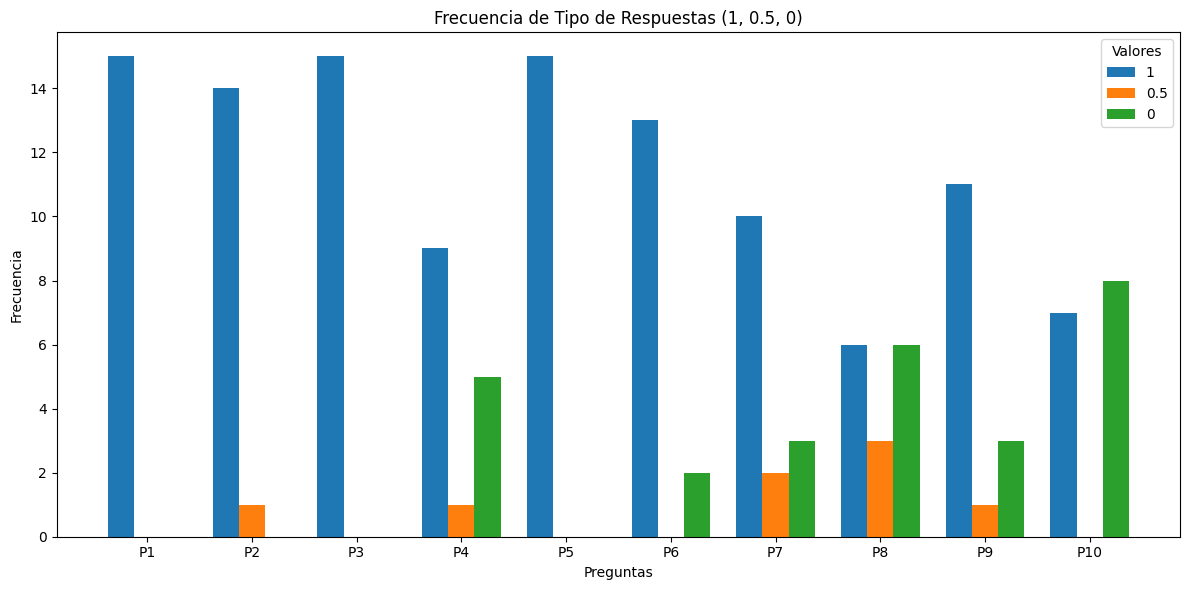

In [5]:
# Prepare data for plotting
counts = pd.DataFrame()

for column in df_P.columns:
    # Count occurrences of each value (1, 0.5, 0)
    value_counts = df_P[column].value_counts().reindex([1, 0.5, 0], fill_value=0)
    counts[column] = value_counts

# Transpose the DataFrame for easier plotting
counts = counts
counts.index = ['1', '0.5', '0']  # Set index to represent the values

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Set the bar width
bar_width = 0.25
x = np.arange(len(counts.columns))  # the label locations

# Create bars for each value
for i, value in enumerate(counts.index):
    ax.bar(x + i * bar_width, counts.loc[value], width=bar_width, label=value)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Preguntas')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia de Tipo de Respuestas (1, 0.5, 0)')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(counts.columns)
ax.legend(title='Valores')

# Adjust layout
plt.tight_layout()
plt.show()

# Analizar el comportamiento de la calificación final

In [6]:
df_R = df['Resultado']
df_R

0     100.0
1      80.0
2      95.0
3      90.0
4      55.0
5      90.0
6      85.0
7     100.0
8      70.0
9      50.0
10     90.0
11     60.0
12     75.0
13     65.0
14     85.0
Name: Resultado, dtype: float64

In [7]:
df_R.describe()

count     15.000000
mean      79.333333
std       16.131897
min       50.000000
25%       67.500000
50%       85.000000
75%       90.000000
max      100.000000
Name: Resultado, dtype: float64

In [8]:
df_R.mode()

0    90.0
Name: Resultado, dtype: float64

In [9]:
df_R.median()

np.float64(85.0)

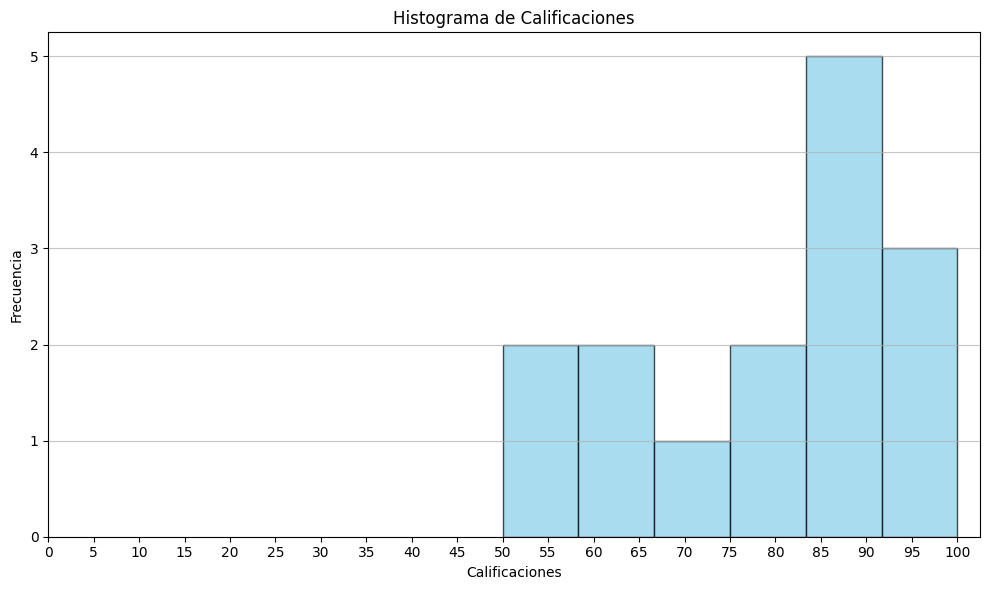

In [10]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Resultado'], bins=6, color='skyblue', edgecolor='black', alpha=0.7)

# Adding titles and labels
plt.title('Histograma de Calificaciones')
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 101, 5))  # Set x-ticks from 50 to 100 with a step of 5

# Show grid
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.tight_layout()
plt.show()

# Añadir punto extra y ver nueva distribución

In [11]:
# Add 10 to the 'Scores' column
df['Resultado_2'] = df['Resultado'] + 10

# Cap the 'Scores' column to a maximum of 100
df['Resultado_2'] = df['Resultado_2'].clip(upper=100)

df['Resultado_2']

0     100.0
1      90.0
2     100.0
3     100.0
4      65.0
5     100.0
6      95.0
7     100.0
8      80.0
9      60.0
10    100.0
11     70.0
12     85.0
13     75.0
14     95.0
Name: Resultado_2, dtype: float64

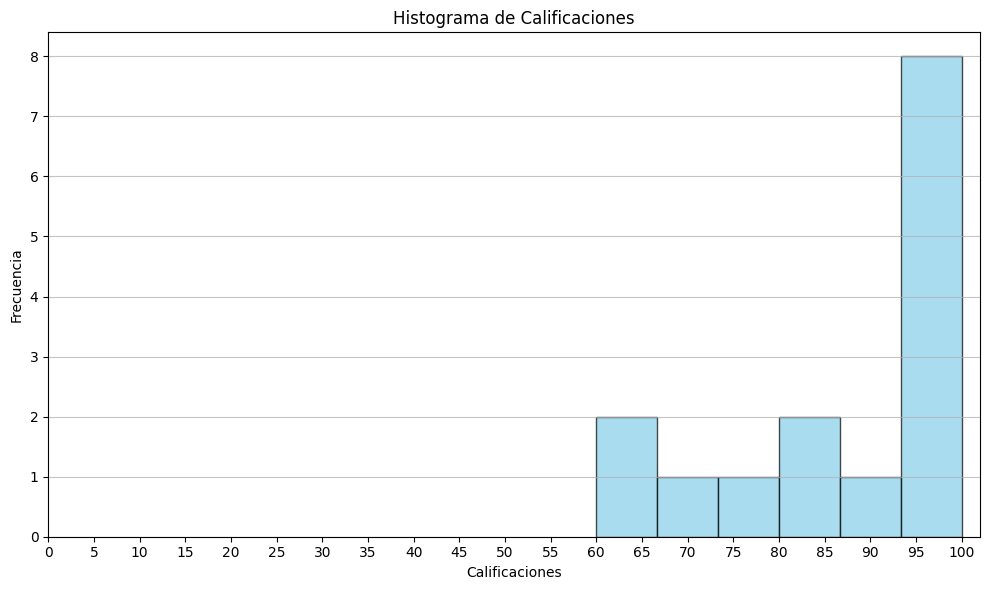

In [12]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Resultado_2'], bins=6, color='skyblue', edgecolor='black', alpha=0.7)

# Adding titles and labels
plt.title('Histograma de Calificaciones')
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 101, 5))  # Set x-ticks from 50 to 100 with a step of 5

# Show grid
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.tight_layout()
plt.show()